# Case Study on Measures of Central Tendency and Dispersion

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
studdata=pd.read_csv("D:\python programming\CaseStudy2\StudentsPerformance.csv")
studdata.head(5)
##Loading data from a csv file and print first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


## 1. Find out how many males and females participated in the test.


In [2]:
studdata['gender'].value_counts()
##Gives the total number of students who participated in the test gender wise

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.02, 'Number of students participated in the test by gender')

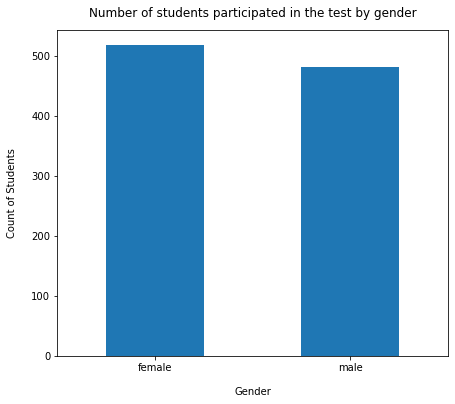

In [3]:
studdata['gender'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plt.xlabel("Gender",labelpad=14)
plt.ylabel("Count of Students",labelpad=14)
plt.title("Number of students participated in the test by gender",y=1.02)
##Simple visualization of the number total number of students who participated in the test gender wise

## 2. What do you think about the students' parental level of education?

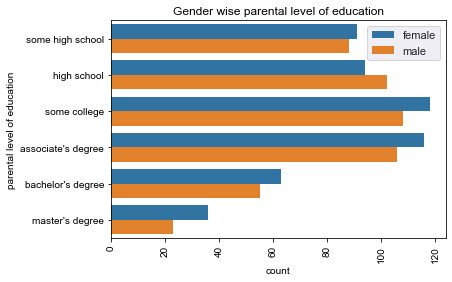

In [4]:
sns.countplot(y='parental level of education',hue='gender',data=studdata)
sns.set(rc={'figure.figsize':(40,40)})
plt.xticks(rotation=90)
plt.title('Gender wise parental level of education')
plt.legend(loc=1)

This countplot shows parental level of education in gender wise. We can spot that the number of females are greater than males in most of the case

## 3.a. Who scores the most on average for math, reading and writing based on Gender


<AxesSubplot:xlabel='gender'>

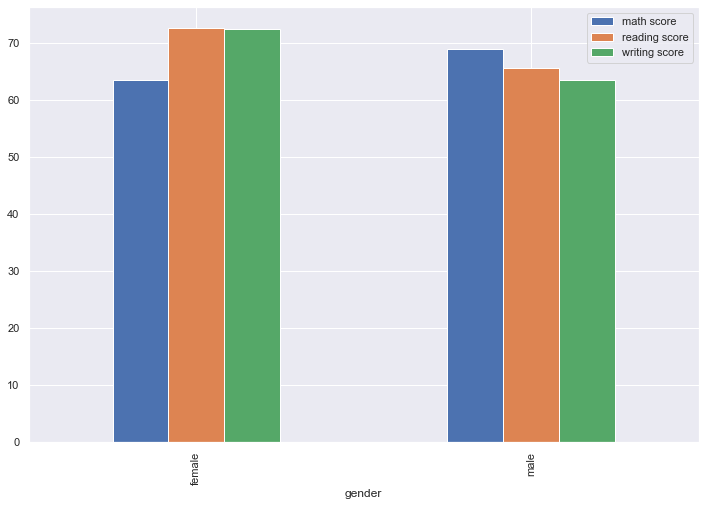

In [5]:
studdata.groupby('gender')[['math score','reading score','writing score']].mean().plot(kind='bar',figsize=(12,8))

When we analysing the students performance, female students have performed better on average as compared to male students

## 3.b. Who scores the most on average for math, reading and writing based on Test preparation course

<AxesSubplot:xlabel='test preparation course'>

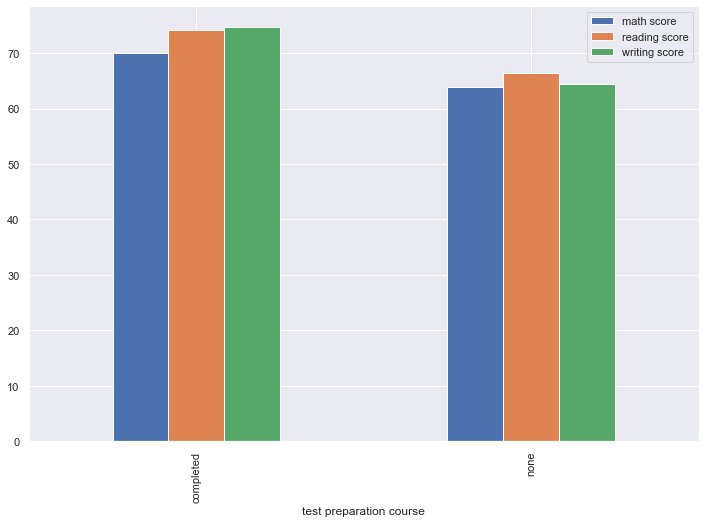

In [6]:
studdata.groupby('test preparation course')[['math score','reading score','writing score']].mean().plot(kind='bar',figsize=(12,8))

The graph clearly shows that the students who have completed the test preparation course have performed better, on average, as compared to students who have not complted the test preparation course

## 4.a. What do you think about the scoring variation for math, reading and writing based on Gender

In [6]:
studdata[['gender','math score','reading score','writing score']].groupby(['gender']).agg('mean')

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


## 4.b. What do you think about the scoring variation for math, reading and writing based on Test preparation course


In [5]:
studdata[['test preparation course','math score','reading score','writing score']].groupby(['test preparation course']).agg('mean')

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


<AxesSubplot:xlabel='test preparation course,gender'>

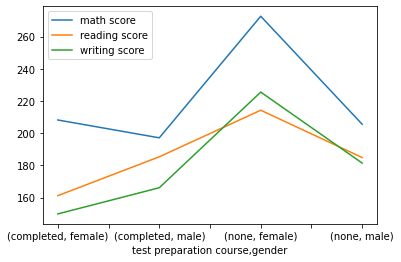

In [10]:
studdata[['test preparation course','gender','math score','reading score','writing score']].groupby(['test preparation course','gender']).var().plot(kind='line')

Scoring variation based on gender and test preparation course,it is clear that the female students are best in overall performace. We can sopt that the male students performance in maths score is high as compared to female students.  

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [49]:
import statistics## for statistical functions
statistics.quantiles(studdata['math score'],n=4,method='inclusive')##divides the data set into 3 quartiles

[57.0, 66.0, 77.0]

In [37]:
studdata.describe()## tabular representation of measures of central tendency and dispersion

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [60]:
topstud=studdata.sort_values('math score', ascending=False)

In [51]:
topstud['QuantileRank']= pd.qcut(topstud['math score'],q = 4, labels = False)
##quantile rank means 0 (0-25), 1 (25-50), 2 (50-75),3 (75 - 100)

In [52]:
topstud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,QuantileRank
999,male,group E,bachelor's degree,standard,completed,100,100,100,3
996,male,group A,some college,standard,completed,100,96,86,3
515,female,group E,some college,standard,none,100,92,97,3
517,female,group E,associate's degree,standard,none,100,100,100,3
516,female,group E,bachelor's degree,standard,none,100,100,100,3
...,...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28,0
51,female,group C,some high school,free/reduced,none,13,41,51,0
3,female,group B,some college,standard,none,11,38,32,0
1,female,group B,high school,free/reduced,none,8,24,23,0


In [57]:
top=topstud[topstud['QuantileRank']==3]
top

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,QuantileRank
999,male,group E,bachelor's degree,standard,completed,100,100,100,3
996,male,group A,some college,standard,completed,100,96,86,3
515,female,group E,some college,standard,none,100,92,97,3
517,female,group E,associate's degree,standard,none,100,100,100,3
516,female,group E,bachelor's degree,standard,none,100,100,100,3
...,...,...,...,...,...,...,...,...,...
862,male,group D,high school,free/reduced,completed,78,77,80,3
863,male,group D,some high school,standard,completed,78,81,86,3
864,male,group E,some high school,free/reduced,completed,78,83,80,3
865,male,group E,associate's degree,free/reduced,completed,78,74,72,3


Text(0.5, 1.02, 'Number of students participated in the test by gender')

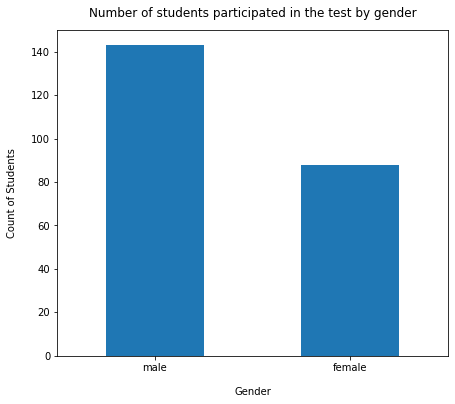

In [58]:
top['gender'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plt.xlabel("Gender",labelpad=14)
plt.ylabel("Count of Students",labelpad=14)
plt.title("Number of students participated in the test by gender",y=1.02)

In [59]:
top['gender'].value_counts()

male      143
female     88
Name: gender, dtype: int64

The top 25% students will lies in the third quartile of the data set based on their math score. Here 231 students will get bonus points based on their maths score. 143 male students and 88 female students are included in the top 25%. Analyzing the students performance male students are best in this class.